# Analysis for figure S12

## Installations & Downloads

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pickle
import scipy
import pandas as pd
from scipy import stats
from scipy.stats import normaltest
import matplotlib as mpl
import itertools
from itertools import groupby

sys.path.append(os.path.abspath('../..'))

import warnings
warnings.simplefilter('ignore', pd.errors.DtypeWarning)
np.seterr(divide='ignore')
warnings.simplefilter("ignore")


import analysis.calc_single_cell_properties as calculator 
import analysis.utils as utils
import data_layer.utils as data_utils
from configuration import consts, params

# Load the data

In [2]:
scores_df_s3 = data_utils.get_scores_df_with_fusion()

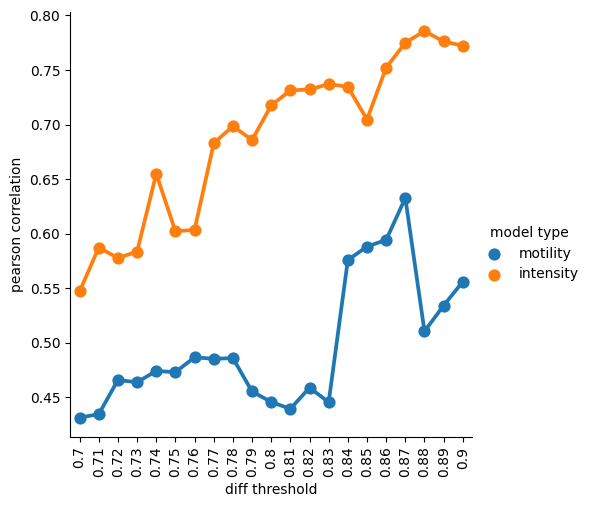

In [13]:
pearson_r_lst_mot = []
pearson_r_lst_int = []

threshold_range = np.arange(0.70, 0.9, 0.01)
for thresh in threshold_range:
    mot_diff_time = calculator.get_terminal_diff_time(scores_df_s3, "motility", thresh).dropna(subset=["terminal_diff_time_motility"])
    int_diff_time = calculator.get_terminal_diff_time(scores_df_s3, "intensity", thresh).dropna(subset=["terminal_diff_time_intensity"])
    
    p_mot, p_val_mot = scipy.stats.pearsonr(mot_diff_time["terminal_diff_time_motility"], mot_diff_time["fusion_time"])
    p_int, p_val_int = scipy.stats.pearsonr(int_diff_time["terminal_diff_time_intensity"], int_diff_time["fusion_time"])
    
    pearson_r_lst_mot.append(p_mot)
    pearson_r_lst_int.append(p_int)

df_mot = pd.DataFrame({"pearson correlation":pearson_r_lst_mot, "diff threshold":np.round_(threshold_range,2), "model type": "motility"})
df_int = pd.DataFrame({"pearson correlation":pearson_r_lst_int, "diff threshold":np.round_(threshold_range,2), "model type": "intensity"})
df = pd.concat([df_mot, df_int], ignore_index=True)
sns.catplot(data=df, x="diff threshold", y="pearson correlation", kind="point", hue="model type")
plt.xticks(rotation=90)
# plt.savefig(consts.storage_path + f"eps_figs/differentiation threshold analysis.eps", format="eps")
plt.show()